# Linearna regresija

### Učitavanje potrebnih biblioteka i funkcija; Setup seaborn modula

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style="ticks", color_codes=True)
colors = sns.color_palette('pastel')[0:2]

### Učitavanje podataka iz .csv datoteke i pregled imena prediktora

In [14]:
fileName="car_purchase.csv"
df=pd.read_csv(fileName)
print(df.keys())

Index(['customer_id', 'gender', 'age', 'annual_salary', 'credit_card_debt',
       'net_worth', 'max_purchase_amount'],
      dtype='object')


### Prikaz nekoliko prvih i poslednjih primera iz dostupnog skupa

In [15]:
linesToShow=5
print(df.iloc[np.r_[0:linesToShow, df.shape[0]-linesToShow:df.shape[0]],:])

     customer_id gender  age  annual_salary  credit_card_debt  net_worth  \
0              1      F   42       62812.09          11609.38  238961.25   
1              2      F   41       66646.89           9572.96  530973.91   
2              3      M   43       53798.55          11160.36  638467.18   
3              4      M   58       79370.04          14426.16  548599.05   
4              5      M   57       59729.15           5358.71  560304.07   
395          396      M   35       61723.01           9913.19  291897.41   
396          397      F   55       72310.40           3093.71  724025.41   
397          398      F   37       67548.77          10462.36  388284.30   
398          399      F   48       62175.69          12967.28  343290.68   
399          400      F   32       60584.85           8133.46  129635.63   

     max_purchase_amount  
0               35321.46  
1               45115.53  
2               42925.71  
3               67422.36  
4               55915.46  
3

### Statističke informacije numeričkih prediktora

In [16]:
print("Mean values:")
print(df.iloc[:,1:].mean(numeric_only=True))
print("Standard deviations:")
print(df.iloc[:,1:].std(numeric_only=True))

Mean values:
age                        46.345000
annual_salary           61996.506450
credit_card_debt         9713.518250
net_worth              435396.144475
max_purchase_amount     44363.875700
dtype: float64
Standard deviations:
age                         7.871523
annual_salary           11679.246855
credit_card_debt         3412.761433
net_worth              176477.556299
max_purchase_amount     10614.581382
dtype: float64


### Raspodele pojedinačnih prediktora

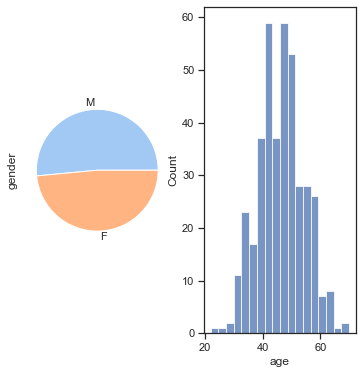

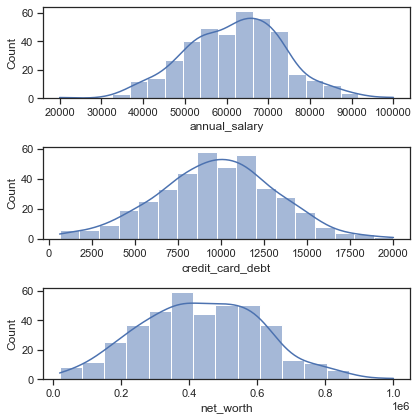

In [17]:
fig1, axs1 = plt.subplots(1,2,figsize=(6,6))
df['gender'].value_counts().plot(kind='pie',y='gender',ax=axs1[0], colors=colors)
sns.histplot(df, x="age", ax=axs1[1])
fig2, axs2 = plt.subplots(3,1,figsize=(6,6))
sns.histplot(df, x="annual_salary", ax=axs2[0], kde = True)
sns.histplot(df, x="credit_card_debt", ax=axs2[1], kde = True)
sns.histplot(df, x="net_worth", ax=axs2[2], kde = True)
plt.tight_layout()

### Međusobne zavisnosti prediktora i ciljne promenljive


Koeficijenti korelacije između ciljne promenljive i numeričkih prediktora:
customer_id            0.022312
age                    0.612983
annual_salary          0.627631
credit_card_debt       0.008573
net_worth              0.477398
max_purchase_amount    1.000000
Name: max_purchase_amount, dtype: float64



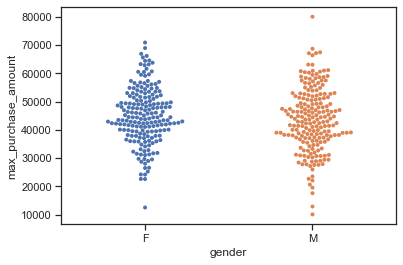

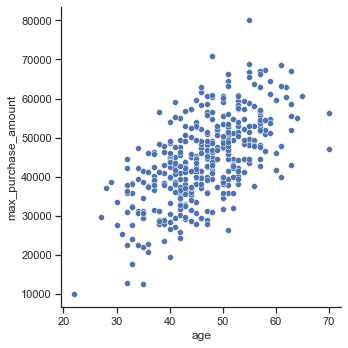

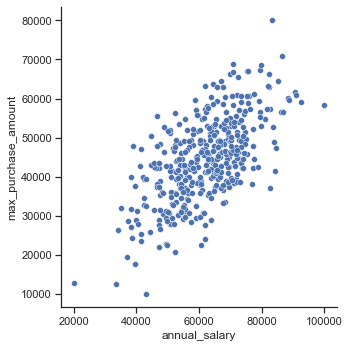

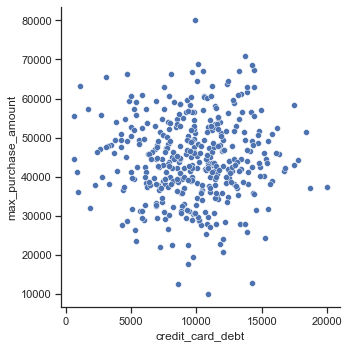

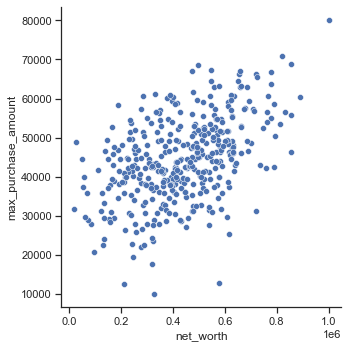

In [18]:
fig3, ax3 = plt.subplots()
sns.swarmplot(x="gender", y="max_purchase_amount", data=df,s = 4,ax=ax3)
sns.relplot(x="age", y="max_purchase_amount", data=df)
sns.relplot(x="annual_salary", y="max_purchase_amount", data=df)
sns.relplot(x="credit_card_debt", y="max_purchase_amount", data=df)
sns.relplot(x="net_worth", y="max_purchase_amount", data=df)

print("\nKoeficijenti korelacije između ciljne promenljive i numeričkih prediktora:")
print(df.corr().iloc[:,-1])
print()

### Redukcija dimenzionalnosti selekcijom prediktora

In [19]:
df.drop(['customer_id','gender', 'credit_card_debt'], axis=1, inplace=True)

### Podela na obučavajući i testirajući skup

In [20]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train_raw, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Skaliranje podataka i inicijalizacija parametara

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_raw)

w=np.random.rand(np.shape(X)[1])
w0=np.random.rand()
L=0.1

### Hipoteza i kriterijumska funkcija

In [22]:
def h(w,w0,X):
    y=np.matmul(X,w) + w0
    return y
def J(w,w0,X,y):
    y_pred=h(w,w0,X)
    return np.sum((y-y_pred)**2)/np.shape(X)[0]

### Algoritam gradijentnog spusta

Parametri modela
{'w_0': 43953.96283472124, 'w_1': 6432.804035109362, 'w_2': 6683.747651169652, 'w_3': 5072.173241421723}


R2 skor modela linearne regresije
0.99956
Srednje kvadratna greška modela linearne regresije
57631.65556


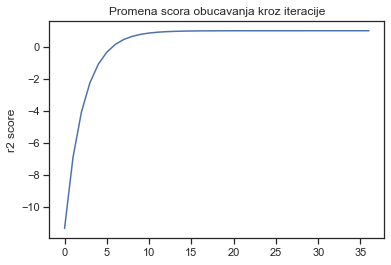

In [23]:
J_curr=J(w,w0,X_train,y_train)
J_prev=np.inf
r2=[]
while(np.abs(J_curr-J_prev)>100):
    J_prev=J_curr
    Dw=-2*np.sum(X_train*(y_train-h(w,w0,X_train))[:,None], axis=0)/np.shape(X_train)[0]
    Dw0=-2*np.sum((y_train-h(w,w0,X_train)), axis=0)/np.shape(X_train)[0]
    w-=Dw*L
    w0-=Dw0*L
    J_curr=J(w,w0,X_train,y_train)
    r2.append(r2_score(y_train, h(w,w0,X_train)))
y_pred=h(w,w0,scaler.transform(X_test))

fig2,axs2 = plt.subplots()
axs2.plot(r2)
axs2.set_ylabel('r2 score')
axs2.set_title('Promena scora obucavanja kroz iteracije')

print("Parametri modela")
keys=["w_0","w_1","w_2","w_3"]
print(dict(zip(keys,np.insert(w,0,w0))))
print("\n\nR2 skor modela linearne regresije")
print("%.5f" % r2_score(y_test, y_pred))
print("Srednje kvadratna greška modela linearne regresije")
print("%.5f" % mean_squared_error(y_test, y_pred))

### Regresija korišćenjem ugrađenih funkcija iz biblioteke scikit-learn

In [24]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train_raw, y_train)
print("Parametri modela")
keys=["w_0","w_1","w_2","w_3"]
print(dict(zip(keys,np.insert(pipe[1].coef_,0,pipe[1].intercept_))))
print("\n\nR2 skor modela linearne regresije")
print("%.5f" %pipe.score(X_test, y_test))
print("Srednje kvadratna greška modela linearne regresije")
print("%.5f" % mean_squared_error(y_test, pipe.predict(X_test)))

Parametri modela
{'w_0': 43965.37670000001, 'w_1': 6435.419179705979, 'w_2': 6686.365269295244, 'w_3': 5074.870638633138}


R2 skor modela linearne regresije
0.99956
Srednje kvadratna greška modela linearne regresije
56736.19138


In [25]:
plt.show()